In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [9]:
y_train.shape

(50000, 1)

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_train[10000]

array([[[ 35,  25,  26],
        [ 27,  21,  21],
        [ 25,  20,  19],
        ...,
        [132, 129, 129],
        [133, 121, 116],
        [126, 115, 113]],

       [[ 63,  55,  50],
        [ 32,  27,  21],
        [ 17,  13,   8],
        ...,
        [102,  95,  88],
        [105,  89,  76],
        [100,  86,  77]],

       [[ 99,  91,  84],
        [ 49,  45,  37],
        [ 15,  12,   5],
        ...,
        [ 46,  43,  39],
        [ 52,  41,  34],
        [ 52,  44,  41]],

       ...,

       [[166, 165, 171],
        [164, 163, 166],
        [164, 164, 165],
        ...,
        [173, 172, 170],
        [170, 170, 168],
        [167, 167, 167]],

       [[169, 168, 176],
        [169, 168, 173],
        [168, 168, 171],
        ...,
        [172, 171, 170],
        [168, 167, 167],
        [165, 165, 166]],

       [[173, 172, 179],
        [175, 174, 178],
        [173, 173, 175],
        ...,
        [170, 168, 169],
        [168, 167, 168],
        [166, 166, 168]]

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
# convert this 2D array to 1D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
# function to plot 
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

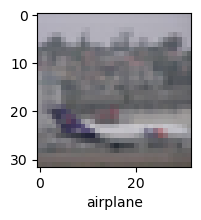

In [24]:
plot_sample(X_train,y_train,30000)

In [25]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the 
# channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
# Build simple artificial neural network (ANN) for image classification
# Here we use softmax activation function for output layer because
# Sigmoid is used for binary classification methods where we only have 2 classes,
# while SoftMax applies to multiclass problems. In fact, the SoftMax function is an extension of the Sigmoid function.
# we are using 3000,1000 as random numbers in 2 hidden layers and 10 as output layers because we have 10 categories as output

ann_model = models.Sequential([
     layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann_model.compile(
            optimizer='SGD',loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann_model.fit(X_train, y_train, epochs=10)

C:\Users\Lenovo\Desktop\code\ML\DeepLearning\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.3058 - loss: 1.9297
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4212 - loss: 1.6465
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4526 - loss: 1.5542
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4709 - loss: 1.4971
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.4913 - loss: 1.4413
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5089 - loss: 1.3944
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.5215 - loss: 1.3606
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.5343 - loss: 1.3217
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5513 - loss: 1.2813
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - accuracy: 0.5601 - loss: 1.2555


In [27]:
# Sparse_categorical_crossentropy vs categorical_crossentropy (keras, accuracy) in loss function
# If your targets are one-hot encoded (like 0,1,,0,0,0) =>  use categorical_crossentropy
# If your targets are integers (like classification in 1,2,3), use sparse_categorical_crossentropy

In [28]:
# Retrain the same model using convolutional neural network to train our images
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Lenovo\Desktop\code\ML\DeepLearning\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3927 - loss: 1.6691
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6060 - loss: 1.1312
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6575 - loss: 0.9808
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6900 - loss: 0.8815
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7192 - loss: 0.8068
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7404 - loss: 0.7483
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7590 - loss: 0.6966
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7767 - loss: 0.6381
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7931 - loss: 0.5929
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8064 - loss: 0.5594


In [31]:
cnn_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6947 - loss: 0.9808


[0.9974281191825867, 0.6909999847412109]

In [33]:
y_pred = cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [34]:
y_pred

array([[8.3037128e-04, 2.7128281e-03, 1.6425162e-03, ..., 5.5089640e-06,
        3.1482447e-02, 5.4012500e-05],
       [9.4770559e-04, 2.4976050e-02, 4.4493319e-08, ..., 2.0547265e-11,
        9.7407228e-01, 3.8323356e-06],
       [2.5301788e-02, 6.8902853e-03, 2.4635287e-04, ..., 1.0891466e-04,
        9.6602070e-01, 3.4840996e-04],
       ...,
       [4.3248924e-04, 5.0390157e-05, 2.2594640e-01, ..., 1.5422140e-01,
        3.3616234e-04, 7.3406161e-05],
       [6.3367393e-03, 8.4791631e-01, 7.7668815e-03, ..., 4.8014405e-04,
        5.3790818e-06, 3.8753205e-04],
       [4.3930377e-06, 4.8272181e-05, 6.5976026e-05, ..., 9.9778110e-01,
        2.4404079e-07, 1.0036008e-07]], dtype=float32)

In [35]:
y_pred[:5]

array([[8.30371282e-04, 2.71282811e-03, 1.64251623e-03, 8.51744831e-01,
        1.38320056e-05, 1.03790775e-01, 7.72294495e-03, 5.50896402e-06,
        3.14824469e-02, 5.40125002e-05],
       [9.47705586e-04, 2.49760505e-02, 4.44933193e-08, 1.28953090e-07,
        5.17132864e-11, 1.39239009e-09, 4.79630513e-09, 2.05472653e-11,
        9.74072278e-01, 3.83233555e-06],
       [2.53017880e-02, 6.89028529e-03, 2.46352865e-04, 1.00699102e-03,
        7.17814009e-06, 4.86261961e-05, 2.08531619e-05, 1.08914661e-04,
        9.66020703e-01, 3.48409958e-04],
       [9.34448421e-01, 5.99053549e-03, 6.27492927e-03, 1.01591358e-02,
        2.73408019e-04, 8.65759430e-05, 1.16028276e-03, 1.43791285e-05,
        4.15685698e-02, 2.38754365e-05],
       [1.63944193e-07, 2.48037992e-07, 1.63436541e-03, 9.27827146e-04,
        1.74174011e-02, 4.74277476e-05, 9.79971528e-01, 5.48590720e-07,
        8.27799624e-08, 4.24552042e-07]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1, 4, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [39]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [41]:
a=np.array([[1,1],[1,-1]])
b=np.array([[2],[3]])
c=a+b
c

array([[3, 3],
       [4, 2]])